# <font color='red'>Implement SGD Classifier with Logloss and L2 regularization Using SGD without using sklearn</font>

**There will be some functions that start with the word "grader" ex: grader_weights(), grader_sigmoid(), grader_logloss() etc, you should not change those function definition.<br><br>Every Grader function has to return True.**

<font color='red'> Importing packages</font>

In [49]:
import numpy as np
import pandas as pd
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import linear_model

<font color='red'>Creating custom dataset</font>

In [50]:
# please don't change random_state
X, y = make_classification(n_samples=50000, n_features=15, n_informative=10, n_redundant=5,
                           n_classes=2, weights=[0.7], class_sep=0.7, random_state=15)
# make_classification is used to create custom dataset 
# Please check this link (https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_classification.html) for more details

In [51]:
X.shape, y.shape

((50000, 15), (50000,))

<font color='red'>Splitting data into train and test </font>

In [52]:
#please don't change random state
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=15)

In [53]:
# # Standardizing the data.
# scaler = StandardScaler()
# X_train = scaler.fit_transform(X_train)
# X_test = scaler.transform(X_test)

In [54]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((37500, 15), (37500,), (12500, 15), (12500,))

# <font color='red' size=5>SGD classifier</font>

In [55]:
# alpha : float
# Constant that multiplies the regularization term. 

# eta0 : double
# The initial learning rate for the ‘constant’, ‘invscaling’ or ‘adaptive’ schedules.

clf = linear_model.SGDClassifier(eta0=0.0001, alpha=0.0001, loss='log', random_state=15, penalty='l2', tol=1e-3, verbose=2, learning_rate='constant')
clf
# Please check this documentation (https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDClassifier.html) 

SGDClassifier(eta0=0.0001, learning_rate='constant', loss='log',
              random_state=15, verbose=2)

In [56]:
clf.fit(X=X_train, y=y_train) # fitting our model

-- Epoch 1
Norm: 0.77, NNZs: 15, Bias: -0.316653, T: 37500, Avg. loss: 0.455552
Total training time: 0.01 seconds.
-- Epoch 2
Norm: 0.91, NNZs: 15, Bias: -0.472747, T: 75000, Avg. loss: 0.394686
Total training time: 0.02 seconds.
-- Epoch 3
Norm: 0.98, NNZs: 15, Bias: -0.580082, T: 112500, Avg. loss: 0.385711
Total training time: 0.03 seconds.
-- Epoch 4
Norm: 1.02, NNZs: 15, Bias: -0.658292, T: 150000, Avg. loss: 0.382083
Total training time: 0.04 seconds.
-- Epoch 5
Norm: 1.04, NNZs: 15, Bias: -0.719528, T: 187500, Avg. loss: 0.380486
Total training time: 0.05 seconds.
-- Epoch 6
Norm: 1.05, NNZs: 15, Bias: -0.763409, T: 225000, Avg. loss: 0.379578
Total training time: 0.06 seconds.
-- Epoch 7
Norm: 1.06, NNZs: 15, Bias: -0.795106, T: 262500, Avg. loss: 0.379150
Total training time: 0.06 seconds.
-- Epoch 8
Norm: 1.06, NNZs: 15, Bias: -0.819925, T: 300000, Avg. loss: 0.378856
Total training time: 0.07 seconds.
-- Epoch 9
Norm: 1.07, NNZs: 15, Bias: -0.837805, T: 337500, Avg. loss: 0.

SGDClassifier(eta0=0.0001, learning_rate='constant', loss='log',
              random_state=15, verbose=2)

In [57]:
clf.coef_, clf.coef_.shape, clf.intercept_
#clf.coef_ will return the weights
#clf.coef_.shape will return the shape of weights
#clf.intercept_ will return the intercept term

(array([[-0.42336692,  0.18547565, -0.14859036,  0.34144407, -0.2081867 ,
          0.56016579, -0.45242483, -0.09408813,  0.2092732 ,  0.18084126,
          0.19705191,  0.00421916, -0.0796037 ,  0.33852802,  0.02266721]]),
 (1, 15),
 array([-0.8531383]))

In [58]:
predictions = clf.predict(X_test)

In [59]:
from sklearn.metrics import accuracy_score,classification_report

In [60]:
accuracy_score(y_test, predictions)

0.83336

In [61]:
clf.C

1.0



```
# This is formatted as code
```

## <font color='red' size=5> Implement Logistic Regression with L2 regularization Using SGD: without using sklearn </font>






1.  We will be giving you some functions, please write code in that functions only.

2.  After every function, we will be giving you expected output, please make sure that you get that output. 






<br>

* Initialize the weight_vector and intercept term to zeros (Write your code in <font color='blue'>def initialize_weights()</font>)

* Create a loss function (Write your code in <font color='blue'>def logloss()</font>) 

 $log loss = -1*\frac{1}{n}\Sigma_{for each Yt,Y_{pred}}(Ytlog10(Y_{pred})+(1-Yt)log10(1-Y_{pred}))$
- for each epoch:

    - for each batch of data points in train: (keep batch size=1)

        - calculate the gradient of loss function w.r.t each weight in weight vector (write your code in <font color='blue'>def gradient_dw()</font>)

        $dw^{(t)} = x_n(y_n − σ((w^{(t)})^{T} x_n+b^{t}))- \frac{λ}{N}w^{(t)})$ <br>

        - Calculate the gradient of the intercept (write your code in <font color='blue'> def gradient_db()</font>) <a href='https://drive.google.com/file/d/1nQ08-XY4zvOLzRX-lGf8EYB5arb7-m1H/view?usp=sharing'>check this</a>

           $ db^{(t)} = y_n- σ((w^{(t)})^{T} x_n+b^{t}))$

        - Update weights and intercept (check the equation number 32 in the above mentioned <a href='https://drive.google.com/file/d/1nQ08-XY4zvOLzRX-lGf8EYB5arb7-m1H/view?usp=sharing'>pdf</a>): <br>
        $w^{(t+1)}← w^{(t)}+α(dw^{(t)}) $<br>

        $b^{(t+1)}←b^{(t)}+α(db^{(t)}) $
    - calculate the log loss for train and test with the updated weights (you can check the python assignment 10th question)
    - And if you wish, you can compare the previous loss and the current loss, if it is not updating, then
        you can stop the training
    - append this loss in the list ( this will be used to see how loss is changing for each epoch after the training is over )


<font color='blue'>Initialize weights </font>

In [62]:
def initialize_weights(dim):
    ''' In this function, we will initialize our weights and bias'''
    #initialize the weights to zeros array of (1,dim) dimensions
    #you use zeros_like function to initialize zero, check this link https://docs.scipy.org/doc/numpy/reference/generated/numpy.zeros_like.html
    #initialize bias to zero
    
    w = np.zeros_like(dim) # initializing weight as array of zeros using numpy
    b = 0 # initializing bias as zero

    return w,b

In [63]:
dim=X_train[0] 
w,b = initialize_weights(dim)
print('w =',(w))
print('b =',str(b))

w = [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
b = 0


<font color='cyan'>Grader function - 1 </font>

In [64]:
dim=X_train[0] 
print(dim)
w,b = initialize_weights(dim)
print(w)
def grader_weights(w,b):
    assert((len(w)==len(dim)) and b==0 and np.sum(w)==0.0)
    return True
grader_weights(w,b)

[-0.57349184 -0.19015688 -0.06584143 -0.86990562 -2.80927706 -1.43345052
  0.35862361  0.24627836 -2.25803168 -0.87761289  2.31023199 -0.3484947
 -2.2575668  -1.93628665  1.65242231]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


True

<font color='blue'>Compute sigmoid </font>

$sigmoid(z)= 1/(1+exp(-z))$

In [65]:
def sigmoid(z):
    ''' In this function, we will return sigmoid of z'''
    # compute sigmoid(z) and return
    sig = 1/(1+np.exp(-z))

    return sig

<font color='cyan'>Grader function - 2</font>

In [66]:
def grader_sigmoid(z):
    val=sigmoid(z)
    assert(val==0.8807970779778823)
    return True
grader_sigmoid(2)

True

<font color='blue'> Compute loss </font>

$log loss = -1*\frac{1}{n}\Sigma_{for each Yt,Y_{pred}}(Ytlog10(Y_{pred})+(1-Yt)log10(1-Y_{pred}))$

In [67]:
def logloss(y_true,y_pred):
    '''In this function, we will compute log loss '''
    temp = 0
    loss = 0
    n = len(y_true)
    for i in range(len(y_true)):
#         print(y_true[i])
#         print(y_pred[i])
        temp = temp + y_true[i]*np.log10(y_pred[i]) + (1-y_true[i])*np.log10(1-y_pred[i])
    
    loss = -1* (temp/n)
    return float(loss)

<font color='cyan'>Grader function - 3 </font>

In [68]:
def grader_logloss(true,pred):
    loss=logloss(true,pred)
#     print(loss)
#     print(type(loss))
    assert(loss==0.07644900402910389)
    return True
true=[1,1,0,1,0]
pred=[0.9,0.8,0.1,0.8,0.2]
grader_logloss(true,pred)

True

<font color='blue'>Compute gradient w.r.to  'w' </font>

$dw^{(t)} = x_n(y_n − σ((w^{(t)})^{T} x_n+b^{t}))- \frac{λ}{N}w^{(t)}$ <br>

In [85]:
def gradient_dw(x,y,w,b,alpha,N):
    '''In this function, we will compute the gardient w.r.to w '''
    z = np.dot(w.T,x) + b
    sigma = 1 / (1 + np.exp(-z))
    dw = x*(y - sigma) - ((alpha/N)*w)
    return dw

<font color='cyan'>Grader function - 4 </font>

In [86]:
def grader_dw(x,y,w,b,alpha,N):
    grad_dw=gradient_dw(x,y,w,b,alpha,N)
    print(grad_dw)
    print(np.sum(grad_dw))
    assert(np.sum(grad_dw)==2.613689585)
    return True
grad_x=np.array([-2.07864835,  3.31604252, -0.79104357, -3.87045546, -1.14783286,
       -2.81434437, -0.86771071, -0.04073287,  0.84827878,  1.99451725,
        3.67152472,  0.01451875,  2.01062888,  0.07373904, -5.54586092])
grad_y=0
grad_w,grad_b=initialize_weights(grad_x)
alpha=0.0001
N=len(X_train)
grader_dw(grad_x,grad_y,grad_w,grad_b,alpha,N)

[ 1.03932417 -1.65802126  0.39552179  1.93522773  0.57391643  1.40717219
  0.43385535  0.02036643 -0.42413939 -0.99725862 -1.83576236 -0.00725938
 -1.00531444 -0.03686952  2.77293046]
2.613689585


True

<font color='blue'>Compute gradient w.r.to 'b' </font>

$ db^{(t)} = y_n- σ((w^{(t)})^{T} x_n+b^{t})$

In [71]:
 def gradient_db(x,y,w,b):
    '''In this function, we will compute gradient w.r.to b '''
    z = np.dot(w.T,x) + b
    sigma = 1/(1+ np.exp(-z))
    db = y-sigma
    return db

<font color='cyan'>Grader function - 5 </font>

In [72]:
def grader_db(x,y,w,b):
    grad_db=gradient_db(x,y,w,b)
    print(grad_db)
    assert(grad_db==-0.5)
    return True
grad_x=np.array([-2.07864835,  3.31604252, -0.79104357, -3.87045546, -1.14783286,
       -2.81434437, -0.86771071, -0.04073287,  0.84827878,  1.99451725,
        3.67152472,  0.01451875,  2.01062888,  0.07373904, -5.54586092])
grad_y=0
grad_w,grad_b=initialize_weights(grad_x)
alpha=0.0001
N=len(X_train)
grader_db(grad_x,grad_y,grad_w,grad_b)

-0.5


True

<font color='blue'> Implementing logistic regression</font>

In [73]:
def train(X_train,y_train,X_test,y_test,epochs,alpha,eta0):
    ''' In this function, we will implement logistic regression'''
    #Here eta0 is learning rate
    #implement the code as follows
    # initalize the weights (call the initialize_weights(X_train[0]) function)
    # for every epoch
        # for every data point(X_train,y_train)
           #compute gradient w.r.to w (call the gradient_dw() function)
           #compute gradient w.r.to b (call the gradient_db() function)
           #update w, b
        # predict the output of x_train[for all data points in X_train] using w,b
        #compute the loss between predicted and actual values (call the loss function)
        # store all the train loss values in a list
        # predict the output of x_test[for all data points in X_test] using w,b
        #compute the loss between predicted and actual values (call the loss function)
        # store all the test loss values in a list
        # you can also compare previous loss and current loss, if loss is not updating then stop the process and return w,b

    
    # initializing weight and bias
    w, b = initialize_weights(X_train[0])
    
    # No.of data points
    N = len(X_train)
    
    # lists to store losses for each epoch
    train_losses = []
    test_losses = []
    
    for e in range(epochs): # for each epoch
        
        for i in range(len(X_train)): # for each datapoint
            
            # find gradient of weight and biases
            dw = gradient_dw(X_train[i], y_train[i], w, b, alpha, N) 
            db = gradient_db(X_train[i], y_train[i], w, b)

            # update weight and biases
            w = w + eta0*dw
            b = b + eta0*db

        ###############################################################################
        ##### calculate train loss for total data points using updataed w and b #######
        y_train_pred = []
        for i in range(len(X_train)):
            x = X_train[i]
            z = np.dot(w.T,x) + b
            y_predicted = sigmoid(z)
            y_train_pred.append(y_predicted)

        train_loss = logloss(y_train, y_train_pred)
        train_losses.append(train_loss)
        ###############################################################################

        ###############################################################################
        ### Calculate test loss for total data points using updated w and b ###########
        y_test_pred = []  
        for i in range(len(X_test)):
            x = X_test[i]
            z = np.dot(w.T,x) + b
            y_predicted = sigmoid(z)
            y_test_pred.append(y_predicted)

        test_loss = logloss(y_test, y_test_pred)
        test_losses.append(test_loss)
        ###############################################################################
        
        ########################### print details of each epoch #######################
        print("epoch :", e+1, " Train loss: ",train_loss, " Test loss: ",test_loss)
        
        ###### Check, if there is no minimization in test loss then return ############
#         if e!=0 and (test_losses[e]-test_losses[e-1]) < 0.00001: # if not first epoch
#                 return w, b
        
    return w,b,train_losses,test_losses

In [74]:
alpha=0.0001
eta0=0.0001
N=len(X_train)
epochs=50
w_,b_, train_loss_, test_loss_=train(X_train,y_train,X_test,y_test,epochs,alpha,eta0)

epoch : 1  Train loss:  0.17545748442854608  Test loss:  0.1759547442321374
epoch : 2  Train loss:  0.16867157050333045  Test loss:  0.16939931358951013
epoch : 3  Train loss:  0.1663916799246292  Test loss:  0.16720591194885742
epoch : 4  Train loss:  0.16536827537403162  Test loss:  0.1662171779933495
epoch : 5  Train loss:  0.16485707459547083  Test loss:  0.16571959463978406
epoch : 6  Train loss:  0.1645882001292827  Test loss:  0.1654555709550864
epoch : 7  Train loss:  0.16444271323364382  Test loss:  0.1653113502079951
epoch : 8  Train loss:  0.16436263615826985  Test loss:  0.1652311685317927
epoch : 9  Train loss:  0.16431806946667746  Test loss:  0.1651860589844903
epoch : 10  Train loss:  0.1642930737413251  Test loss:  0.16516045651849884
epoch : 11  Train loss:  0.1642789743093407  Test loss:  0.16514582028704106
epoch : 12  Train loss:  0.16427098545835503  Test loss:  0.16513739835366367
epoch : 13  Train loss:  0.1642664419100352  Test loss:  0.16513252084404828
epoch 

<p style="font-family:'Segoe UI';font-size:18px;color:blue"><b>Plotting train and test loss</b></p>

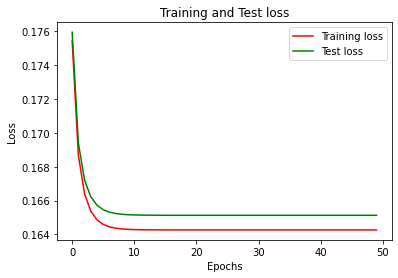

In [75]:
import matplotlib.pyplot as plt
epoch = range(epochs)
plt.plot(epoch, train_loss_, 'r', label='Training loss')
plt.plot(epoch, test_loss_, 'g', label='Test loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Test loss')
plt.legend()
plt.show()

<p style="color:blue;font-family:'Segoe UI';font-size:18px"><b>Training with loss comparison</b></p>

In [76]:
def train(X_train,y_train,X_test,y_test,epochs,alpha,eta0):
    ''' In this function, we will implement logistic regression'''
    #Here eta0 is learning rate
    #implement the code as follows
    # initalize the weights (call the initialize_weights(X_train[0]) function)
    # for every epoch
        # for every data point(X_train,y_train)
           #compute gradient w.r.to w (call the gradient_dw() function)
           #compute gradient w.r.to b (call the gradient_db() function)
           #update w, b
        # predict the output of x_train[for all data points in X_train] using w,b
        #compute the loss between predicted and actual values (call the loss function)
        # store all the train loss values in a list
        # predict the output of x_test[for all data points in X_test] using w,b
        #compute the loss between predicted and actual values (call the loss function)
        # store all the test loss values in a list
        # you can also compare previous loss and current loss, if loss is not updating then stop the process and return w,b

    
    # initializing weight and bias
    w, b = initialize_weights(X_train[0])
    
    # No.of data points
    N = len(X_train)
    
    # lists to store losses for each epoch
    train_losses = []
    test_losses = []
    
    epoch_no=0
    for e in range(epochs): # for each epoch
        epoch_no+=1 #  update the epoch_no
        for i in range(len(X_train)): # for each datapoint
            
            # find gradient of weight and biases
            dw = gradient_dw(X_train[i], y_train[i], w, b, alpha, N) 
            db = gradient_db(X_train[i], y_train[i], w, b)

            # update weight and biases
            w = w + eta0*dw
            b = b + eta0*db

        ###############################################################################
        ##### calculate train loss for total data points using updataed w and b #######
        y_train_pred = []
        for i in range(len(X_train)):
            x = X_train[i]
            z = np.dot(w.T,x) + b
            y_predicted = sigmoid(z)
            y_train_pred.append(y_predicted)

        train_loss = logloss(y_train, y_train_pred)
        train_losses.append(train_loss)
        ###############################################################################

        ###############################################################################
        ### Calculate test loss for total data points using updated w and b ###########
        y_test_pred = []  
        for i in range(len(X_test)):
            x = X_test[i]
            z = np.dot(w.T,x) + b
            y_predicted = sigmoid(z)
            y_test_pred.append(y_predicted)

        test_loss = logloss(y_test, y_test_pred)
        test_losses.append(test_loss)
        ###############################################################################
        
        ########################### print details of each epoch #######################
        print("epoch :", e+1, " Train loss: ",train_loss, " Test loss: ",test_loss)
        
        ###### Check, if there is no minimization in test loss and if loss start increasing then return ############
        if e!=0 and (test_losses[e]-test_losses[e-1]) > 0.0 : # if not first epoch
                return w, b,train_losses,test_losses,epoch_no
        
    return w,b,train_losses,test_losses,epoch_no

In [77]:
alpha=0.0001
eta0=0.0001
N=len(X_train)
epochs=50
w,b,train_loss,test_loss,e=train(X_train,y_train,X_test,y_test,epochs,alpha,eta0)

epoch : 1  Train loss:  0.17545748442854608  Test loss:  0.1759547442321374
epoch : 2  Train loss:  0.16867157050333045  Test loss:  0.16939931358951013
epoch : 3  Train loss:  0.1663916799246292  Test loss:  0.16720591194885742
epoch : 4  Train loss:  0.16536827537403162  Test loss:  0.1662171779933495
epoch : 5  Train loss:  0.16485707459547083  Test loss:  0.16571959463978406
epoch : 6  Train loss:  0.1645882001292827  Test loss:  0.1654555709550864
epoch : 7  Train loss:  0.16444271323364382  Test loss:  0.1653113502079951
epoch : 8  Train loss:  0.16436263615826985  Test loss:  0.1652311685317927
epoch : 9  Train loss:  0.16431806946667746  Test loss:  0.1651860589844903
epoch : 10  Train loss:  0.1642930737413251  Test loss:  0.16516045651849884
epoch : 11  Train loss:  0.1642789743093407  Test loss:  0.16514582028704106
epoch : 12  Train loss:  0.16427098545835503  Test loss:  0.16513739835366367
epoch : 13  Train loss:  0.1642664419100352  Test loss:  0.16513252084404828
epoch 

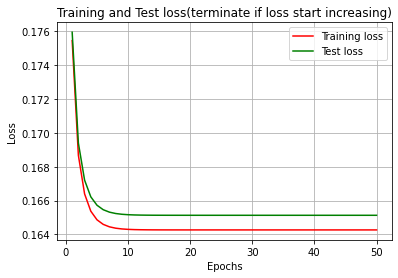

In [78]:
import matplotlib.pyplot as plt
epoch = range(1,e+1)
plt.plot(epoch, train_loss, 'r', label='Training loss')
plt.plot(epoch, test_loss, 'g', label='Test loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Test loss(terminate if loss start increasing)')
plt.legend()
plt.grid()
plt.show()

<font color='red'>Goal of assignment</font>

Compare your implementation and SGDClassifier's the weights and intercept, make sure they are as close as possible i.e difference should be in terms of 10^-3

In [79]:
# these are the results we got after we implemented sgd and found the optimal weights and intercept
w-clf.coef_, b-clf.intercept_

(array([[-0.00642552,  0.00755955,  0.00012041, -0.00335043, -0.01309563,
          0.00978314,  0.00724319,  0.00418409,  0.0125563 , -0.00701162,
          0.00169655, -0.00480346, -0.00173041,  0.00056208,  0.00032075]]),
 array([-0.03911387]))

In [80]:
# weight and bias of 50 epochs
w_-clf.coef_, b_-clf.intercept_

(array([[-0.00642552,  0.00755955,  0.00012041, -0.00335043, -0.01309563,
          0.00978314,  0.00724319,  0.00418409,  0.0125563 , -0.00701162,
          0.00169655, -0.00480346, -0.00173041,  0.00056208,  0.00032075]]),
 array([-0.03911387]))

<font color='blue'>Plot epoch number vs train , test loss </font>

* epoch number on X-axis
* loss on Y-axis

<p style="font-family:'Segoe UI';font-size:16px;color:green"><b>Answer:</b> I have plotted above</p>

In [81]:
def pred(w,b, X):
    N = len(X)
    predict = []
    for i in range(N):
        z=np.dot(w,X[i])+b
        if sigmoid(z) >= 0.5: # sigmoid(w,x,b) returns 1/(1+exp(-(dot(x,w)+b)))
            predict.append(1)
        else:
            predict.append(0)
    return np.array(predict)
print(1-np.sum(y_train - pred(w,b,X_train))/len(X_train))
print(1-np.sum(y_test  - pred(w,b,X_test))/len(X_test))

0.9522133333333334
0.95


#### Accuracy with 50 epochs

In [82]:
print(1-np.sum(y_train - pred(w_,b_,X_train))/len(X_train))
print(1-np.sum(y_test  - pred(w_,b_,X_test))/len(X_test))

0.9522133333333334
0.95
